<a href="https://colab.research.google.com/github/bharathi6127/progidy_wd_04/blob/main/twitter_entity_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Twitter entity sentiment analysis

 Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [17]:
import csv

def clean_csv(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        for row in reader:
            try:
                writer.writerow(row)
            except Exception as e:
                print(f"Skipping line due to error: {e}")

clean_csv('/content/twitter_train.csv', '/content/cleaned_twitter_train.csv')
clean_csv('/content/twitter_validate.csv', '/content/cleaned_twitter_validate.csv')

#import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load the datasets

In [19]:
# Load the cleaned datasets
train_df = pd.read_csv('/content/cleaned_twitter_train.csv')
test_df = pd.read_csv('/content/cleaned_twitter_validate.csv')


# Display the first few rows of both datasets

In [20]:
print("Train Dataset:")
print(train_df.head())
print("\nTest Dataset:")
print(test_df.head())


Train Dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Test Dataset:
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m

In [31]:
print("Train Dataset:")
print(train_df.tail())
print("\nTest Dataset:")
print(test_df.tail())

Train Dataset:
       2401  Borderlands  Positive  \
39303  5546  Hearthstone  Negative   
39304  5546  Hearthstone  Negative   
39305  5547  Hearthstone  Positive   
39306  5547  Hearthstone  Positive   
39307  5547  Hearthstone  Positive   

      im getting on borderlands and i will murder you all ,  \
39303  @PlayHearthstone On installing the Apple mobil...      
39304  @PlayHearthstone With the mobile version I onl...      
39305  Well, I really liked this new hero for sure! J...      
39306  Well, I definitely liked this new hero! I just...      
39307  Well, of course, I really liked this new hero!...      

                                            cleaned_text  sentiment  \
39303  playhearthstone installing apple mobile versio...  -0.133333   
39304  playhearthstone mobile version get read messag...   0.000000   
39305  well really liked new hero sure got great roun...   0.356061   
39306  well definitely liked new hero great lap golde...   0.459091   
39307              wel

In [30]:
print(train_df.shape)
print(test_df.shape)


(39308, 8)
(999, 8)


# Check the data types

In [21]:
print("\nTrain Dataset Types:")
print(train_df.dtypes)
print("\nTest Dataset Types:")
print(test_df.dtypes)


Train Dataset Types:
2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object

Test Dataset Types:
3364                                                                                                                                                                                                                                                   int64
Facebook                                                                                                                                                                                                                                              object
Irrelevant                                                                                                                                                                           

# Preprocess the text data

In [22]:
def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [token.lower() for token in tokens]
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        tokens = [token for token in tokens if token.isalpha()]

        return ' '.join(tokens)
    else:
        return ""

train_df['cleaned_text'] = train_df['im getting on borderlands and i will murder you all ,'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'].apply(preprocess_text)


# Perform sentiment analysis


In [23]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

train_df['sentiment'] = train_df['cleaned_text'].apply(get_sentiment)
test_df['sentiment'] = test_df['cleaned_text'].apply(get_sentiment)

def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

train_df['sentiment_label'] = train_df['sentiment'].apply(classify_sentiment)
test_df['sentiment_label'] = test_df['sentiment'].apply(classify_sentiment)


# Visualize sentiment distribution

<ipython-input-24-d2f2ca9f1ed8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=train_df, palette=['green', 'gray', 'red'])


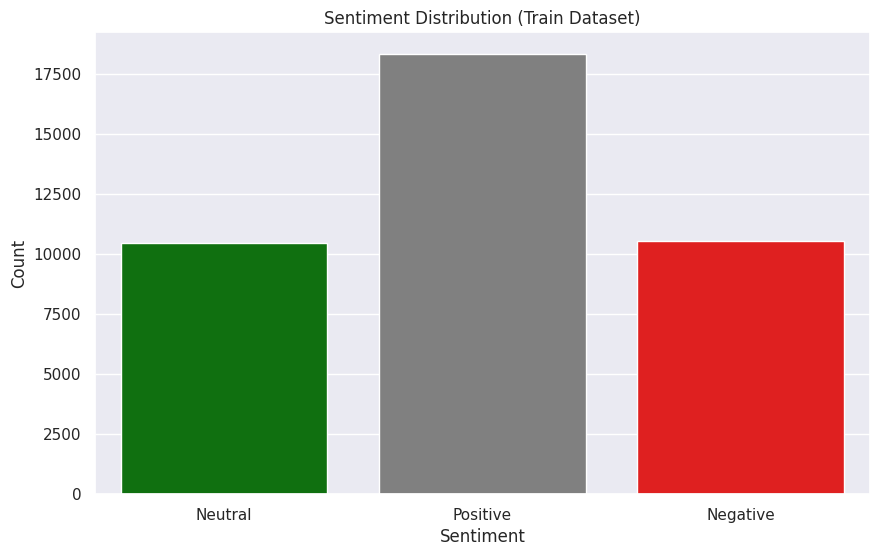

In [24]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_label', data=train_df, palette=['green', 'gray', 'red'])
plt.title('Sentiment Distribution (Train Dataset)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-25-fec31f39608a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=test_df, palette=['green', 'gray', 'red'])


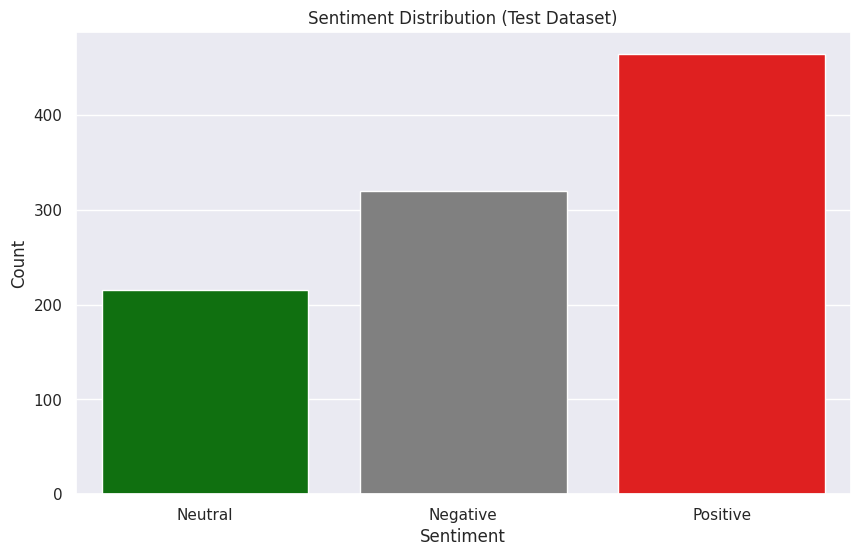

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_label', data=test_df, palette=['green', 'gray', 'red'])
plt.title('Sentiment Distribution (Test Dataset)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

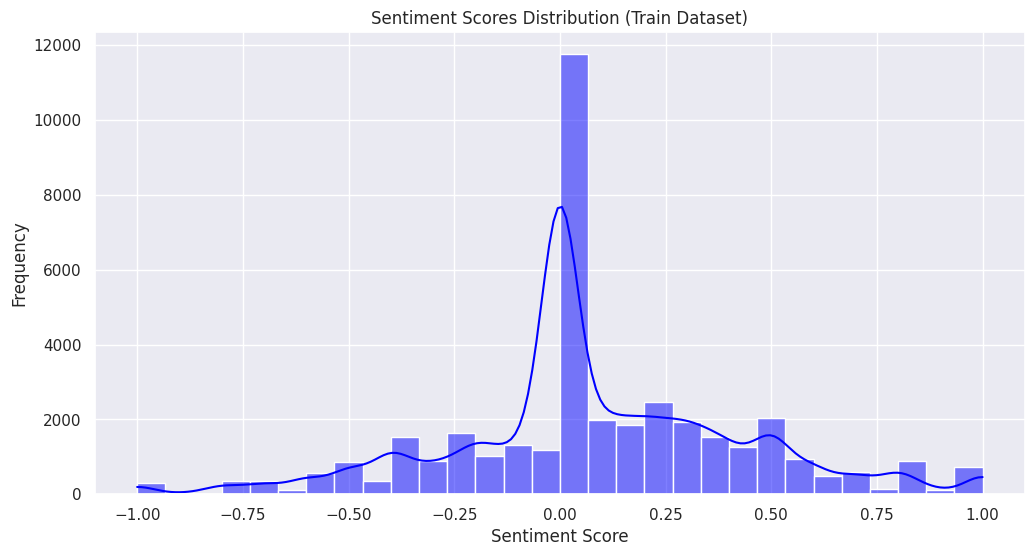

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Scores Distribution (Train Dataset)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

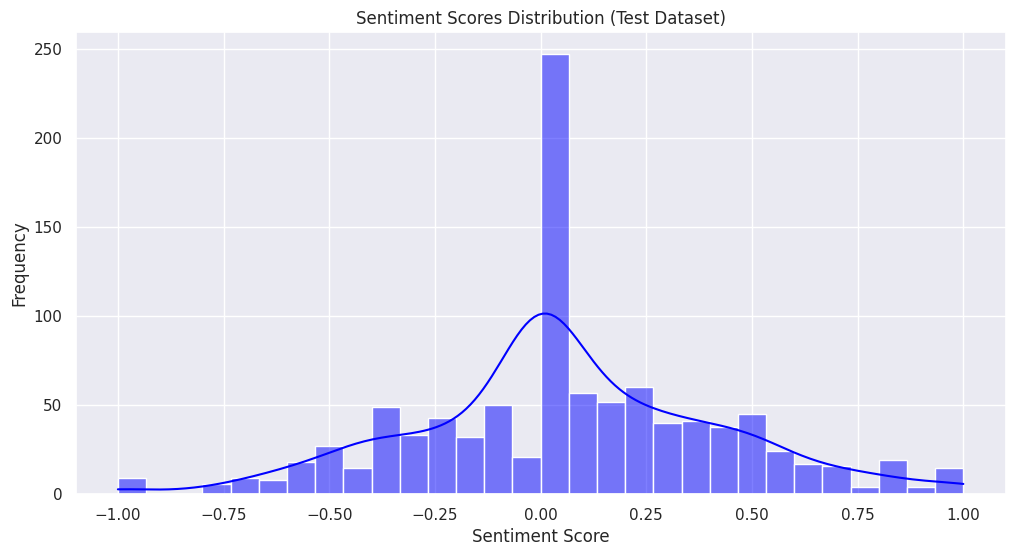

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(test_df['sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Scores Distribution (Test Dataset)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-28-af070ba891b7>:6: UserWarning: 
The palette list has fewer values (3) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='sentiment_label', hue='topic', data=train_df, palette=['green', 'gray', 'red'])


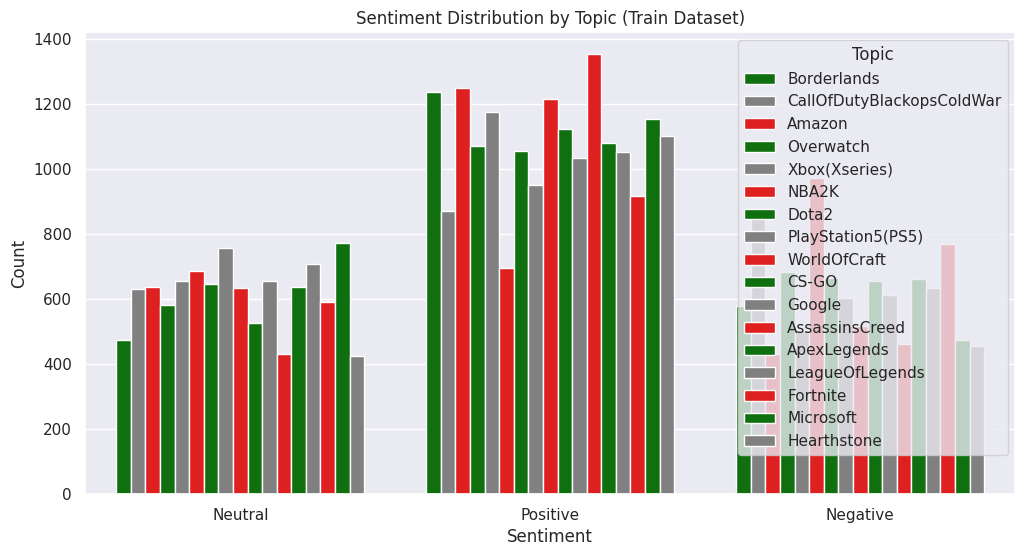

In [28]:
# Assuming 'Borderlands' and 'Facebook' columns represent topics or brands in both datasets
train_df['topic'] = train_df['Borderlands']
test_df['topic'] = test_df['Facebook']

plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment_label', hue='topic', data=train_df, palette=['green', 'gray', 'red'])
plt.title('Sentiment Distribution by Topic (Train Dataset)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Topic')
plt.show()

